## **NLP Tutorial: Text Classification Using Spacy Word Embeddings**

### **Problem Statement**

* Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

* Fake news spreads faster than real news and creates problems and fear among groups and in society.

* We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is **Real or Fake Message**.

* We will use **glove embeddings** from spacy which is trained on massive wikipedia dataset to pre-process and text vectorization and apply different classification algorithms.

### **Dataset**

Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

* This data consists of two columns. - Text - label

* Text is the statements or messages regarding a particular event/situation.

* label feature tells whether the given text is Fake or Real.

* As there are only 2 classes, this problem comes under the **Binary Classification.**

In [12]:
import pandas as pd
import csv

#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv("/Fake_Real_Data.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head(5)

(10322, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [13]:
#check the distribution of labels
df['label'].value_counts()

,count
label,
Fake,5209
Real,5113


From the above, we can see that almost the labels(classes) occured equal number of times and balanced. There is no problem of class imbalance and hence no need to apply any balancing techniques like undersampling, oversampling etc.

In [14]:
#Add the new column which gives a unique number to each of these labels
df['label_num'] = df['label'].map({'Fake' : 0, 'Real': 1})

#check the results with top 5 rows
df.head(5)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


### **Get spacy word vectors and store them in a pandas dataframe**

In [15]:
!python -m spacy download en_core_web_lg # Download the en_core_web_lg model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [16]:
import spacy

nlp = spacy.load("en_core_web_lg")

**Vectorizer EX:-**

In [19]:
doc = nlp("NLP and Computer Vision are 2 feilds that are famous in ML domain")
doc.vector

array([-2.5353379e+00, -1.7931054e+00,  1.2289307e+00,  1.8870008e+00,
        3.4767356e+00,  1.6042731e+00,  9.3804568e-02,  3.6077204e+00,
       -9.4557309e-01, -1.5644047e+00,  4.9262619e+00,  1.1420677e+00,
       -3.1005924e+00,  5.3635442e-01,  3.0886583e+00,  1.2636793e+00,
        5.7386839e-01,  1.0546596e+00, -9.1770387e-01, -1.2691522e+00,
        4.6355996e-01, -6.7945522e-01, -3.1472185e+00,  6.0846255e-04,
       -2.2740057e+00,  1.4709465e-01, -8.1626916e-01, -1.7719767e+00,
       -1.1474522e+00,  5.9913617e-01,  1.7907653e+00,  1.8551232e-01,
       -2.9132237e+00, -2.8203001e+00, -2.4263926e+00, -1.2504337e+00,
       -7.3636967e-01,  1.0511146e+00,  1.5484931e+00,  2.1169382e-01,
        2.0267122e+00,  5.3139538e-01, -9.0453142e-01,  1.7711307e+00,
       -2.2078438e+00,  2.9457464e+00,  1.0996424e+00, -1.3667009e+00,
        3.8681000e-01, -8.5340244e-01, -7.5187844e-01,  1.2620038e+00,
        5.5331463e-01, -4.9168768e+00, -6.2277001e-01,  1.6573116e+00,
      

In [20]:
doc.vector.shape

(300,)

In [21]:
#This will take some time(nearly 15 minutes)
df['vector'] = df['Text'].apply(lambda text: nlp(text).vector)

In [22]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.6759837, 1.4263071, -2.318466, -0.451093, ..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-1.8355803, 1.3101058, -2.4919677, 1.0268308,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-1.9851209, 0.14389805, -2.4221718, 0.9133005..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-2.7812982, -0.16120885, -1.609772, 1.3624227..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-2.2010763, 0.9961637, -2.4088492, 1.128273, ..."


A different approach first without vector values to see the diff.

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

In [36]:
X_train

,vector
5454,"[-2.0434623, 1.0724537, -2.58761, 0.38581443, ..."
8157,"[-1.166243, 2.1569707, -1.821371, 0.5123665, 3..."
8492,"[-1.840874, 0.6053931, -1.6588248, 0.5601994, ..."
408,"[-1.7854267, 0.76514035, -1.7144898, 0.4492868..."
9076,"[-2.13729, 0.8330757, -2.2616618, 0.23635933, ..."
...,...
6384,"[-1.7275234, 0.46716693, -2.2142153, 1.6745464..."
4720,"[-1.4236364, 1.2774339, -2.1359737, 0.00070837..."
173,"[-2.3045952, 0.29060102, -1.654057, 0.602605, ..."
1244,"[-1.2304933, 0.77764124, -1.8801185, 0.5045891..."


but we need to get the vector values in it.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

In [39]:
X_train.shape

(8257,)

In [40]:
X_train

array([array([-2.0434623 ,  1.0724537 , -2.58761   ,  0.38581443,  3.7714148 ,
               0.721104  ,  0.6456886 ,  3.9165914 , -0.3312406 , -0.5152918 ,
               4.867953  ,  1.4743557 , -3.4043083 ,  1.3001162 ,  0.25425628,
               1.4473279 ,  1.1620516 , -0.97312033, -1.74871   , -1.7553653 ,
               1.2125025 , -0.50549066, -0.21710327, -0.17246264,  0.3792699 ,
              -1.4932823 , -2.3354611 , -0.85895294, -0.9884077 ,  0.96097827,
               1.1281862 , -0.2026757 , -0.6507756 , -1.908697  , -1.9343435 ,
              -1.2748983 , -0.3385644 ,  0.67500967,  1.0840337 ,  0.73961294,
               0.37337458,  0.23876917,  0.12074678,  0.26809517, -2.2167509 ,
               1.347193  ,  1.3925434 , -2.0668004 , -0.7762669 ,  1.8694266 ,
              -1.0337801 ,  1.5057055 , -0.32885763, -4.8753786 , -0.8397518 ,
               0.25761065, -0.0901337 ,  0.99371123,  1.2281712 , -0.37119594,
               0.49088007, -0.77353776,  0.19800836,

In [43]:
X_test.shape

(2065,)

In [44]:
X_test

array([array([-1.58586681e+00,  9.81884897e-01, -2.03634739e+00,  1.65881902e-01,
               3.33622503e+00,  3.11774969e-01,  4.65054750e-01,  3.75091743e+00,
              -7.19443440e-01, -1.07851458e+00,  5.26054430e+00,  1.41790879e+00,
              -3.08729315e+00,  1.06999624e+00,  9.87496734e-01,  1.47964609e+00,
               1.59716654e+00, -4.36173240e-03, -1.23878062e+00, -1.45743155e+00,
               1.25103056e+00, -2.64785498e-01, -1.33632338e+00, -3.44904363e-01,
              -5.48326254e-01, -1.86759257e+00, -2.08544540e+00, -8.80907893e-01,
              -5.93953788e-01,  1.07668924e+00,  7.30144501e-01, -6.51732564e-01,
              -5.45102477e-01, -1.37090683e+00, -2.00578713e+00, -7.53078461e-01,
              -2.31983751e-01,  5.29082298e-01,  1.87230706e+00,  5.44133961e-01,
               1.43300235e-01, -3.99928331e-01, -1.82888061e-01,  1.53337032e-01,
              -1.61564827e+00,  1.43349326e+00,  5.21264434e-01, -2.18154788e+00,
              -6

when we look at the actual array of X_train  &  X-test which is the output give as a numpy array , but the every single individual element is another numpy array. when we give this to our classifier for the training it is expecting 2D numpy array. so we need to convert this array from this format to -> a 2D numpy array.

more deatils : https://numpy.org/doc/stable/reference/generated/numpy.stack.html

In [45]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)
# convert this array from this format to -> a 2D numpy array

In [46]:
X_train_2d

array([[-2.0434623 ,  1.0724537 , -2.58761   , ..., -0.91166455,
        -2.235844  ,  1.0676419 ],
       [-1.166243  ,  2.1569707 , -1.821371  , ..., -0.19112678,
        -2.6052637 ,  1.158034  ],
       [-1.840874  ,  0.6053931 , -1.6588248 , ..., -0.82887137,
        -2.2832494 ,  1.1179142 ],
       ...,
       [-2.3045952 ,  0.29060102, -1.654057  , ..., -1.8792329 ,
        -1.3021306 ,  0.48727357],
       [-1.2304933 ,  0.77764124, -1.8801185 , ...,  0.00956229,
        -2.4981205 ,  0.464666  ],
       [-1.3508813 ,  1.3560826 , -2.2837741 , ..., -0.02391293,
        -3.397426  ,  0.9023697 ]], dtype=float32)

In [47]:
X_test_2d

array([[-1.5858668 ,  0.9818849 , -2.0363474 , ..., -0.5879839 ,
        -2.442496  ,  1.097925  ],
       [-1.5038998 ,  0.3171501 , -1.6589124 , ..., -0.3185345 ,
        -1.7749335 ,  1.13741   ],
       [-1.5111322 ,  0.9254921 , -1.7411258 , ..., -1.2203349 ,
        -2.5029383 ,  0.76945096],
       ...,
       [-2.0237594 ,  0.2942927 , -1.7154083 , ..., -1.2450014 ,
        -2.1090941 ,  0.6936939 ],
       [-2.0789738 ,  0.28822294, -1.627265  , ..., -1.1391928 ,
        -1.378338  ,  0.9412802 ],
       [-2.0604992 ,  0.61635107, -1.9391644 , ..., -1.4046173 ,
        -1.4882965 ,  0.7162314 ]], dtype=float32)

now you see the difference in new arrays

### **Using Naive Bayes Classifier**

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

clf = MultinomialNB()
clf.fit(X_train_2d, y_train)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

negative vector values in array will not accept in MultinomialNB. to tackle this positive negative value issue , we can do Scaling ( it helps to convert the negative values into positife range ) to do is we use MinMaxScaler. we do scalling to both X_train_2D & X_test_2D cause thry both contains negative values. ( X_test_2D will use in evaluation process that why we do scalling for both )

In [53]:
from sklearn.metrics import classification_report

y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1027
           1       0.95      0.94      0.94      1038

    accuracy                           0.94      2065
   macro avg       0.94      0.94      0.94      2065
weighted avg       0.94      0.94      0.94      2065



### **Using KNN (K-Nearest neighbors)**

In [54]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1027
           1       0.99      0.99      0.99      1038

    accuracy                           0.99      2065
   macro avg       0.99      0.99      0.99      2065
weighted avg       0.99      0.99      0.99      2065



### **Confusion Matrix**

Text(95.72222222222221, 0.5, 'Truth')

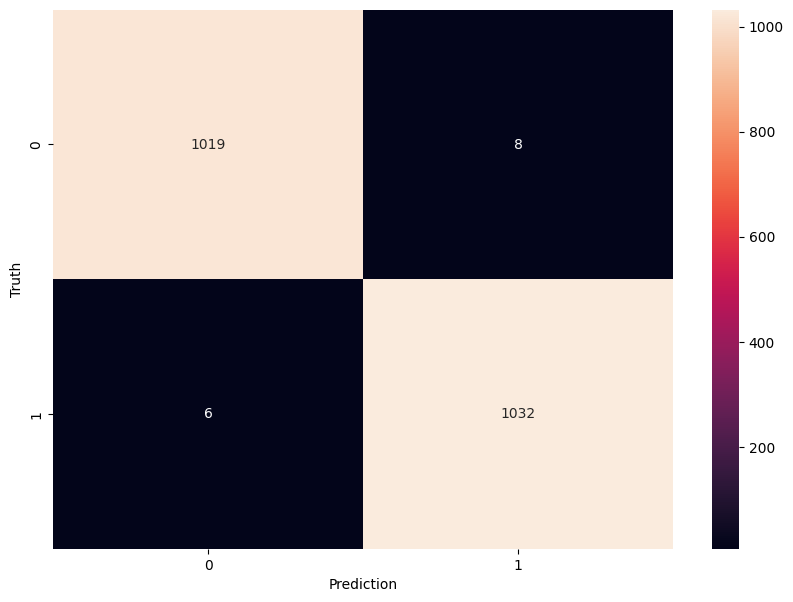

In [55]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

### **Key Takeaways**

1. KNN model which didn't perform well in the vectorization techniques like Bag of words, and TF-IDF due to very high dimensional vector space, performed really well with glove vectors due to only 300-dimensional vectors and very good embeddings(similar and related words have almost similar embeddings) for the given text data.

2. MultinomialNB model performed decently well but did not come into the top list because in the 300-dimensional vectors we also have the negative values present. The Naive Bayes model does not fit the data if there are negative values. So, to overcome this shortcoming, we have used the Min-Max scaler to bring down all the values between 0 to 1. In this process, there will be a possibility of variance and information loss among the data. But anyhow we got a decent recall and f1 scores.